<a href="https://colab.research.google.com/github/ABeleris/EKPA/blob/main/IDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_7 (Conv1D)                    │ (None, 23, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_7 (MaxPooling1D)       │ (None, 11, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 704)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │          90,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 90,883 (355.01 KB)

 Trainable params: 90,883 (355.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.4511 - loss: 1.0742 - val_accuracy: 0.6767 - val_loss: 0.9645
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6610 - loss: 0.9016 - val_accuracy: 0.7248 - val_loss: 0.7723
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7229 - loss: 0.7275 - val_accuracy: 0.7508 - val_loss: 0.6839
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7706 - loss: 0.6460 - val_accuracy: 0.7816 - val_loss: 0.6332
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7897 - loss: 0.5967 - val_accuracy: 0.7882 - val_loss: 0.6026
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8007 - loss: 0.5771 - val_accuracy: 0.7976 - val_loss: 0.5806
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8078 - loss: 0.5512 - val_accuracy: 0.8036 - val_loss: 0.5790
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8163 - loss: 0.5391 - val_accuracy: 0.

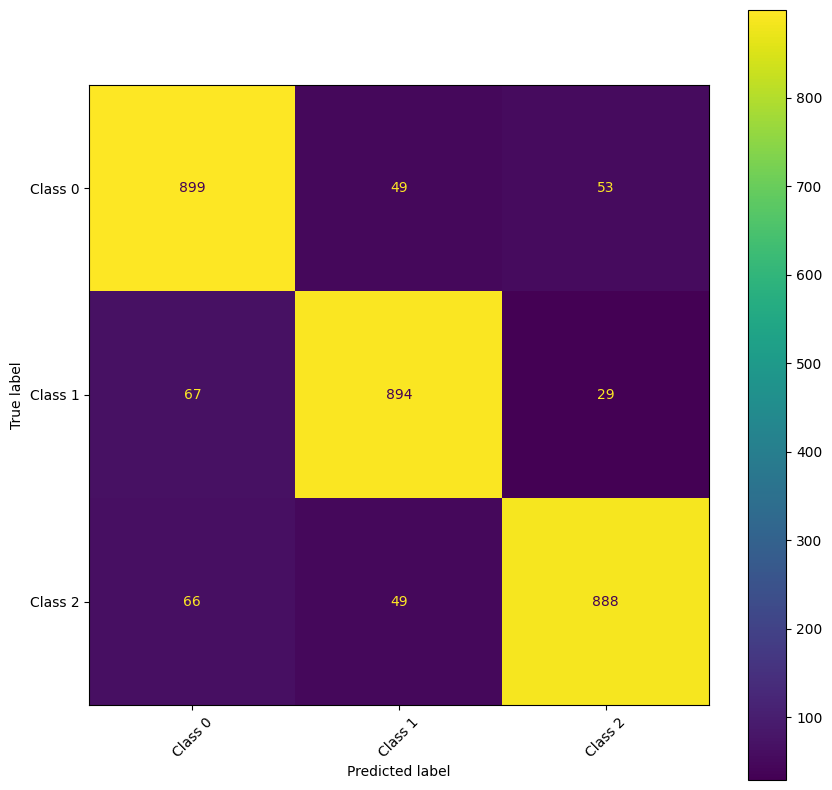

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Input
from sklearn.utils import class_weight
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import ConfusionMatrixDisplay

# Ορισμός παραμέτρων
epochs = 100
nclass = 3  # Αριθμός κατηγοριών στο target

def loadDataset():
    # Χρήση του νέου αρχείου δεδομένων
    filename = 'https://raw.githubusercontent.com/kdemertzis/EKPA/main/Data/pcap_data.csv'
    data = pd.read_csv(filename)
    #print(np.unique(data['target']))

    # Εξαγωγή χαρακτηριστικών και ετικετών
    features = data.iloc[:, :-1].values
    labels = data.iloc[:, -1].values

    # Labels
    label_mapping = {0.0: 0, 2.0: 1, 1.0: 2}
    labels = np.array([label_mapping.get(x, -1) for x in labels])
    mask = labels != -1
    features = features[mask]
    labels = labels[mask]

    # Κανονικοποίηση των χαρακτηριστικών
    features_min = features.min(axis=0)
    features_max = features.max(axis=0)
    features = (features - features_min) / (features_max - features_min)

    # Διαχωρισμός δεδομένων
    train_data, test_data, train_label, test_label = train_test_split(
        features, labels, test_size=0.20, stratify=labels
    )
    train_data, val_data, train_label, val_label = train_test_split(
        train_data, train_label, test_size=0.125, stratify=train_label
    )

    return (
        train_data.astype('float32'), train_label.astype('int32'),
        val_data.astype('float32'), val_label.astype('int32'),
        test_data.astype('float32'), test_label.astype('int32')
    )

# Φόρτωση δεδομένων
train_data, train_labelp, val_data, val_labelp, test_data, test_labelp = loadDataset()

# Μετατροπή σε one-hot encoding
train_label = to_categorical(train_labelp, nclass)
val_label = to_categorical(val_labelp, nclass)
test_label = to_categorical(test_labelp, nclass)

# Υπολογισμός class weights
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_labelp),
    y=train_labelp
)
class_weights = {i: class_weights[i] for i in range(len(class_weights))}

# Δημιουργία του Conv1D μοντέλου
def build_model(input_shape, num_classes):
    model = Sequential([
        Input(shape=input_shape),
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Κατασκευή του μοντέλου
model = build_model(input_shape=(train_data.shape[1], 1), num_classes=nclass)
model.summary()

# Μετατροπή των δεδομένων για Conv1D
train_data = train_data[..., np.newaxis]
val_data = val_data[..., np.newaxis]
test_data = test_data[..., np.newaxis]

# Callbacks
earlyStopping = EarlyStopping(monitor='val_loss', patience=30, verbose=0, mode='min')
modelCheckPoint = ModelCheckpoint(
    './savemodels/model.weights.{epoch:03d}-{val_accuracy:.4f}.keras',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

# Εκπαίδευση του μοντέλου
history = model.fit(
    train_data, train_label,
    epochs=epochs, batch_size=256,
    validation_data=(val_data, val_label),
    callbacks=[earlyStopping, modelCheckPoint],
    class_weight=class_weights
)

# Αξιολόγηση του μοντέλου
pred = model.predict(test_data)
pred_y = pred.argmax(axis=-1)
cm = confusion_matrix(test_labelp, pred_y)
print("Confusion Matrix:\n", cm)

# Οπτικοποίηση πίνακα σύγχυσης
label_names = ["Class 0", "Class 1", "Class 2"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax, xticks_rotation=45)
plt.show()
